In [183]:
# importing the necessary libraries
from PIL import Image 
import matplotlib.pyplot as plt  
from matplotlib import animation
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score as r2
from sklearn.metrics import accuracy_score as asc

# Plotting the mandelbrot set

Since we have already plotted the Mandelbrot set in our previous ppt, we go directly to the modified Mandelbrot set,
by introducing different variables.

In [141]:
# drawing area 
xa = -2.0
xb = 1.0
ya = -1.5
yb = 1.5
  
# max iterations allowed 
maxIt = 255 
  
# image size 
imgx = 512
imgy = 512

### Introducing k 

Here k is a real number introduced into the mandelbrot set, similarly an imaginary number l will be introduced later.

In [142]:
k = np.linspace(-2,1.5,100)
images_k = []
for a in k:
    image_k = Image.new("RGB", (imgx, imgy)) 
    for y in range(imgy): 
            zy = y * (yb - ya) / (imgy - 1)  + ya 
            for x in range(imgx): 
                zx = x * (xb - xa) / (imgx - 1)  + xa 
                z = zx + zy * 1j
                c = z 
                for i in range(maxIt): 
                    if abs(z) > 2.0: break
                    z = z * z + c + a 
                image_k.putpixel((x, y), (i % 4 * 64, i % 8 * 32, i % 16 * 16)) 
    images_k.append(image_k)

100 images are appended in the images_k list which will be used to find out the variation of colors with varying k values.
Here we have chosen black, cyan, brown, green, royalblue, yellow colors only whereas the other colors are kept in the 'other' section.

In [256]:
black_k = []
cyan_k = []
brown_k = []
green_k = []
royalblue_k = []
yellow_k = []
other_k = []
for i in range(len(images_k)):
    im = images_k[i]
    black = 0
    cyan = 0
    brown = 0
    green = 0
    royalblue = 0
    yellow = 0

    for pixel in im.getdata():
        if pixel == (0, 0, 0): # black
            black += 1
        elif pixel == (128,192,224): # cyan
            cyan += 1
        elif pixel == (128, 64, 32):
            brown += 1
        elif pixel == (0, 128, 64):
            green +=1
        elif pixel == (0,0,128):
            royalblue += 1
        elif pixel == (192,224,112):
            yellow +=1
            
        other = 512*512 - (black + cyan + brown + green + royalblue + yellow)
    black_k.append(black)
    cyan_k.append(cyan)
    brown_k.append(brown)
    green_k.append(green)
    royalblue_k.append(royalblue)
    yellow_k.append(yellow)
    other_k.append(other)


### Plotting the variation of colors with increasing k value.

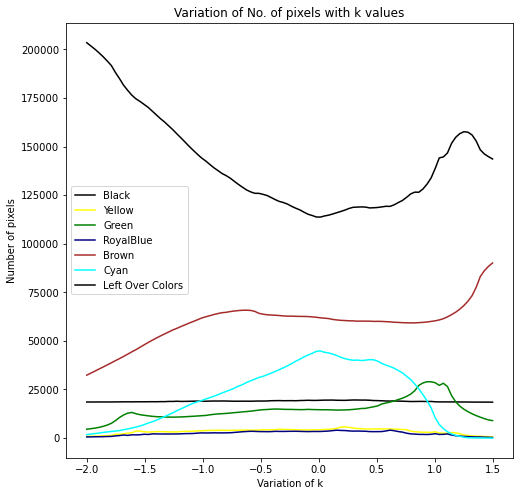

In [257]:
plt.figure(figsize=(8,8))

plt.plot(k, black_k, color = 'k', label = 'Black')
plt.plot(k, yellow_k, color = 'yellow', label = 'Yellow')
plt.plot(k, green_k, color = 'green', label = 'Green')
plt.plot(k, royalblue_k, color = 'navy', label = 'RoyalBlue')
plt.plot(k, brown_k, color = 'brown', label = 'Brown')
plt.plot(k, cyan_k, color = 'cyan', label = 'Cyan')
plt.plot(k, other_k, color = 'black', label = 'Left Over Colors')
plt.xlabel('Variation of k')
plt.ylabel('Number of pixels')
plt.title('Variation of No. of pixels with k values')
plt.legend()
plt.show()

In [258]:
images_k[0].save('a.gif',
               save_all=True,
               append_images=images_k[1:],
               duration=100,
               loop=0)

#By running this cell, we will save the output images in a gif file so that we can visualize how the set is changing with k.

# Finding a regression line

Here we are going to fit a polynomial curve which will tell us the nature of the variation of the colored pixels 
and if all the colors follow the same trend or not.

In [273]:
data = np.stack((cyan_k, black_k, brown_k, green_k, royalblue_k, yellow_k, other_k, k), axis = -1)

In [274]:
df = pd.DataFrame(data = data,index = None, columns = ["cyan_k", "black_k", "brown_k", "green_k", "royalblue_k", 
                                          "yellow_k", "other_k", "k"])
df.head()   

,cyan_k,black_k,brown_k,green_k,royalblue_k,yellow_k,other_k,k
0,1770.0,18554.0,32362.0,4530.0,582.0,844.0,203502.0,-2.000000
1,2042.0,18544.0,33410.0,4812.0,576.0,942.0,201818.0,-1.964646
2,2310.0,18558.0,34440.0,5104.0,656.0,936.0,200140.0,-1.929293
3,2576.0,18572.0,35526.0,5498.0,670.0,1024.0,198278.0,-1.893939
4,2890.0,18570.0,36552.0,6012.0,706.0,1132.0,196282.0,-1.858586


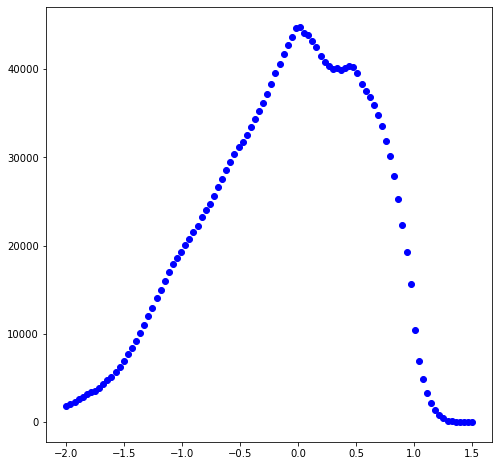

In [275]:
plt.figure(figsize=(8,8))
plt.scatter(df.k, df.cyan_k,  color='blue')
plt.show()

### Taking Cyan Color

Taking Cyan color is important as at all the pixels which are cyan colored, the solution fully converges and are very stable. So, number of cyancolored pixels are nothing but telling us the number of stable points in 512*512 no. of points.

In [276]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
x = np.asarray(df[['k']])
y = np.asarray(df[['cyan_k']])

poly = PolynomialFeatures(degree=8)
x_poly = poly.fit_transform(x)  ''' Applying polynomial transform which Generate a new feature matrix
                                    consisting of all polynomial combinations of the features with degree 
                                    less than or equal to the specified degree'''

In [277]:
regr = linear_model.LinearRegression()
y_ = regr.fit(x_poly, y) # applying linear regression to fit the model on the polynomial features
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[     0.          13135.07144082 -23442.71549221 -22203.7582722
   -6454.65417325   5884.21323126   4585.11575056    491.82257131
    -142.90912543]]
Intercept:  [42037.06862621]


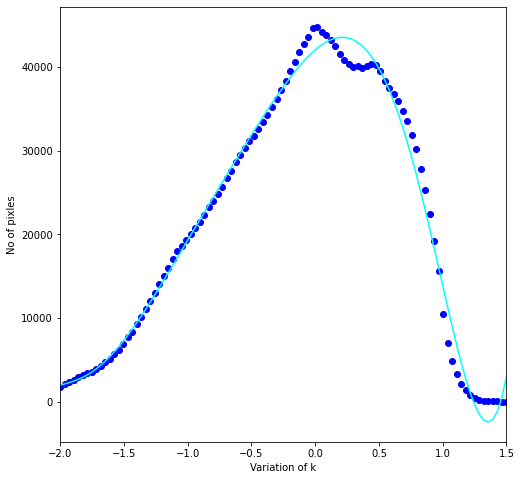

In [278]:
# Plotting the equation derived
plt.figure(figsize=(8,8))
plt.scatter(df.k, df.cyan_k,  color='b')

yy = regr.intercept_[0]+ regr.coef_[0][1]*k+ regr.coef_[0][2]*np.power(k, 2) + regr.coef_[0][3]*np.power(k, 3) +regr.coef_[0][4]*np.power(k, 4) + regr.coef_[0][5]*np.power(k, 5) + regr.coef_[0][6]*np.power(k, 6) + regr.coef_[0][7]*np.power(k, 7) + regr.coef_[0][8]*np.power(k, 8)
plt.plot(k, yy, 'cyan' )
plt.xlabel("Variation of k")
plt.ylabel("No of pixles")
plt.xlim(-2,1.5)
plt.show()

In [279]:
from sklearn.metrics import r2_score
my_data = regr.predict(my_x_poly)
print(f"The R2-score for Cyan: {r2_score(my_data , my_y)}" )

The R2-score for skyblue: 0.9900029073469966


### Taking all colored pixels

In [303]:
coeff = []
intercept = []
rsc = []

# for brown

x_brown_k = np.asarray(df[['k']])
y_brown_k = np.asarray(df[['brown_k']])

poly = PolynomialFeatures(degree=8)
x_poly_brown_k = poly.fit_transform(x_brown_k)

regr_brown_k = linear_model.LinearRegression()
y__brown_k = regr_brown_k.fit(x_poly_brown_k, y_brown_k)
data1 = regr_brown_k.predict(x_poly_brown_k)

coeff.append(regr_brown_k.coef_[0])
intercept.append(regr_brown_k.intercept_[0])
rsc.append(r2_score(my_data1 , y_brown_k))

#for green
x_green_k = np.asarray(df[['k']])
y_green_k = np.asarray(df[['green_k']])

poly = PolynomialFeatures(degree=8)
x_poly_green_k = poly.fit_transform(x_green_k)

regr_green_k = linear_model.LinearRegression()
y__green_k = regr_green_k.fit(x_poly_green_k, y_green_k)
data2 = regr_green_k.predict(x_poly_green_k)

coeff.append(regr_green_k.coef_[0])
intercept.append(regr_green_k.intercept_[0])
rsc.append(r2_score(data2 , y_green_k))

#for other colors
x_other_k = np.asarray(df[['k']])
y_other_k = np.asarray(df[['other_k']])

poly = PolynomialFeatures(degree=8)
x_poly_other_k = poly.fit_transform(x_other_k)

regr_other_k = linear_model.LinearRegression()
y__other_k = regr_other_k.fit(x_poly_other_k, y_other_k)
data2 = regr_other_k.predict(x_poly_other_k)

coeff.append(regr_other_k.coef_[0])
intercept.append(regr_other_k.intercept_[0])
rsc.append(r2_score(data2 , y_other_k))

In [309]:
color = ['brown', 'green', 'others']
for i in range(len(color)):
    print(f'Coefficient of {color[i]} = {coeff[i]}')
    print(f'Intercept of {color[i]} = {intercept[i]}')
    print(f'R squared value of {color[i]} = {rsc[i]}')
    print('*'*120)
    print('\n')

Coefficient of brown = [     0.          -4008.46376434   4831.3156873   -3695.82786105
 -11025.74197839   7781.39474207   6665.11947636  -1063.50756097
   -875.17333409]
Intercept of brown = 61623.20985746326
R squared value of brown = 0.9968185755271842
************************************************************************************************************************


Coefficient of green = [     0.          -6440.93437608   7562.25393651  42164.07465256
   4782.33790177 -36210.66164833 -11012.08026524   8239.59398856
   3160.44936576]
Intercept of green = 14006.419267398938
R squared value of green = 0.9502742269009872
************************************************************************************************************************


Coefficient of others = [     0.          -4949.47197228  14511.32135238 -11043.12153712
  12946.64419972  20095.06844281   -711.8659524   -7289.97715643
  -2033.29768422]
Intercept of others = 116695.07068927516
R squared value of others = 

### Plotting the regression line for the colors

These different colored pixels show us how the solution is diverging, some colors like briwn and black diverges
faster than green and yellow.
We have taken only brown, green colors as they were showing noticeable changes, and remaining colors as others.

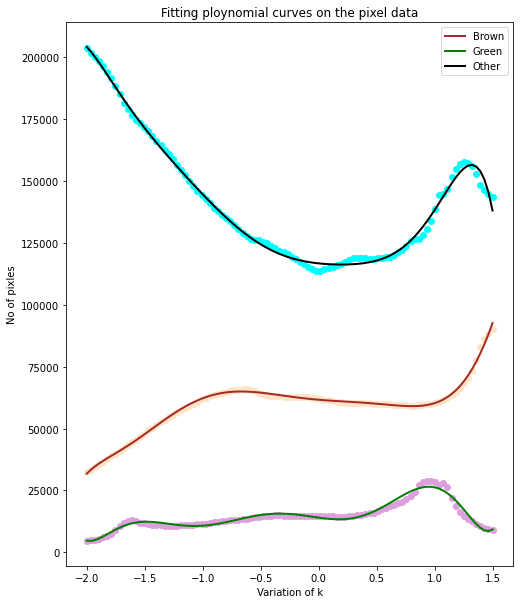

In [342]:
plt.figure(figsize=(8,10))
# Plotting for Brown
plt.scatter(df.k, df.brown_k,  color='bisque')
yy = intercept[0]+ coeff[0][1]*k+ coeff[0][2]*np.power(k, 2) + coeff[0][3]*np.power(k, 3) +coeff[0][4]*np.power(k, 4) + coeff[0][5]*np.power(k, 5) + coeff[0][6]*np.power(k, 6) + coeff[0][7]*np.power(k, 7) +coeff[0][8]*np.power(k, 8)
plt.plot(k, yy, color='brown' , label = 'Brown', linewidth = 2)

# Plotting for Green
plt.scatter(df.k, df.green_k,  color='plum')
yy = intercept[1]+ coeff[1][1]*k+ coeff[1][2]*np.power(k, 2) + coeff[1][3]*np.power(k, 3) +coeff[1][4]*np.power(k, 4) + coeff[1][5]*np.power(k, 5) + coeff[1][6]*np.power(k, 6) + coeff[1][7]*np.power(k, 7) +coeff[1][8]*np.power(k, 8)
plt.plot(k, yy, color='green' , label = 'Green', linewidth = 2)

# Plotting for Others
plt.scatter(df.k, df.other_k,  color='aqua')
yy = intercept[2]+ coeff[2][1]*k+ coeff[2][2]*np.power(k, 2) + coeff[2][3]*np.power(k, 3) +coeff[2][4]*np.power(k, 4) + coeff[2][5]*np.power(k, 5) + coeff[2][6]*np.power(k, 6) + coeff[2][7]*np.power(k, 7) +coeff[2][8]*np.power(k, 8)
plt.plot(k, yy, color='black' , label = 'Other', linewidth = 2)

plt.title('Fitting ploynomial curves on the pixel data')
plt.xlabel("Variation of k")
plt.ylabel("No of pixles")
plt.legend()
plt.show()

# Varying l value

Now lets vary the l value which is an imaginary number as follow the same trend as we did previously.

In [126]:
l = np.linspace(-2,1.5,100)*1j
images_l = []
for a in l:
    image = Image.new("RGB", (imgx, imgy)) 
    for y in range(imgy): 
            zy = y * (yb - ya) / (imgy - 1)  + ya 
            for x in range(imgx): 
                zx = x * (xb - xa) / (imgx - 1)  + xa 
                z = zx + zy * 1j
                c = z 
                for i in range(maxIt): 
                    if abs(z) > 2.0: break
                    z = z * z + c + a 
                image.putpixel((x, y), (i % 4 * 64, i % 8 * 32, i % 16 * 16)) 
    images_l.append(image)

In [129]:
images_l[0].save('b.gif',
               save_all=True,
               append_images=images_l[1:],
               duration=100,
               loop=0)

In [369]:
black_l = []
cyan_l = []
brown_l = []
green_l = []
royalblue_l = []
yellow_l = []
other_l = []
for i in range(len(images_l)):
    im = images_l[i]
    black = 0
    cyan = 0
    brown = 0
    green = 0
    royalblue = 0
    yellow = 0

    for pixel in im.getdata():
        if pixel == (0, 0, 0): # black
            black += 1
        elif pixel == (128,192,224): # cyan
            cyan += 1
        elif pixel == (128, 64, 32):
            brown += 1
        elif pixel == (0, 128, 64):
            green +=1
        elif pixel == (0,0,128):
            royalblue += 1
        elif pixel == (192,224,112):
            yellow +=1
            
        other = 512*512 - (black + cyan + brown + green + royalblue + yellow)
    black_l.append(black)
    cyan_l.append(cyan)
    brown_l.append(brown)
    green_l.append(green)
    royalblue_l.append(royalblue)
    yellow_l.append(yellow)
    other_l.append(other)


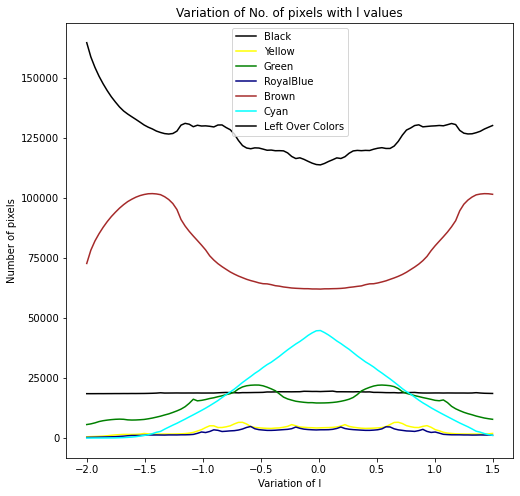

In [370]:
plt.figure(figsize=(8,8))
# since k and l will vary similarly on the x axis, we can replace l by k
plt.plot(k, black_l, color = 'k', label = 'Black')
plt.plot(k, yellow_l, color = 'yellow', label = 'Yellow')
plt.plot(k, green_l, color = 'green', label = 'Green')
plt.plot(k, royalblue_l, color = 'navy', label = 'RoyalBlue')
plt.plot(k, brown_l, color = 'brown', label = 'Brown')
plt.plot(k, cyan_l, color = 'cyan', label = 'Cyan')
plt.plot(k, other_l, color = 'black', label = 'Left Over Colors')
plt.xlabel('Variation of l')
plt.ylabel('Number of pixels')
plt.title('Variation of No. of pixels with l values')
plt.legend()
plt.show()

# Finding the regression line

In [371]:
# taking only the real part of l
data = np.stack((cyan_l, black_l, brown_l, green_l, royalblue_l, yellow_l, other_l, k), axis = -1)


In [372]:
df = pd.DataFrame(data = data,index = None, columns = ["cyan_l", "black_l", "brown_l", "green_l", "royalblue_l", 
                                          "yellow_l", "other_l", "l"])
df.head()   

,cyan_l,black_l,brown_l,green_l,royalblue_l,yellow_l,other_l,l
0,8.0,18476.0,72674.0,5620.0,263.0,529.0,164574.0,-2.000000
1,18.0,18472.0,78196.0,5901.0,311.0,591.0,158655.0,-1.964646
2,25.0,18477.0,82032.0,6321.0,344.0,646.0,154299.0,-1.929293
3,26.0,18488.0,85058.0,6864.0,384.0,717.0,150607.0,-1.893939
4,34.0,18485.0,87724.0,7222.0,427.0,803.0,147449.0,-1.858586


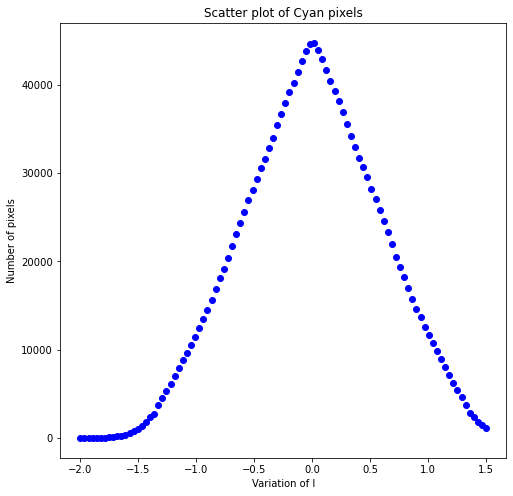

In [373]:
plt.figure(figsize=(8,8))
plt.scatter(df.l, df.cyan_l,  color='blue')
plt.title('Scatter plot of Cyan pixels')
plt.xlabel('Variation of l')
plt.ylabel('Number of pixels')
plt.show()

# Plotting for all four colors altogether

In [377]:
coeff = []
intercept = []
rsc = []
# for Cyan
x_cyan_l = np.asarray(df[['l']])
y_cyan_l = np.asarray(df[['cyan_l']])

poly = PolynomialFeatures(degree=8)
x_poly_cyan_l = poly.fit_transform(x_cyan_l)

regr_cyan_l = linear_model.LinearRegression()
y__cyan_l = regr_cyan_l.fit(x_poly_cyan_l, y_cyan_l)
data1 = regr_cyan_l.predict(x_poly_cyan_l)

coeff.append(regr_cyan_l.coef_[0])
intercept.append(regr_cyan_l.intercept_[0])
rsc.append(r2_score(data1 , y_cyan_l))

# for brown

x_brown_l = np.asarray(df[['l']])
y_brown_l = np.asarray(df[['brown_l']])

poly = PolynomialFeatures(degree=8)
x_poly_brown_l = poly.fit_transform(x_brown_l)

regr_brown_l = linear_model.LinearRegression()
y__brown_l = regr_brown_l.fit(x_poly_brown_l, y_brown_l)
data2 = regr_brown_l.predict(x_poly_brown_l)

coeff.append(regr_brown_l.coef_[0])
intercept.append(regr_brown_l.intercept_[0])
rsc.append(r2_score(data2 , y_brown_l))

#for green
x_green_l = np.asarray(df[['l']])
y_green_l = np.asarray(df[['green_l']])

poly = PolynomialFeatures(degree=8)
x_poly_green_l = poly.fit_transform(x_green_l)

regr_green_l = linear_model.LinearRegression()
y__green_l = regr_green_l.fit(x_poly_green_l, y_green_l)
data3 = regr_green_l.predict(x_poly_green_l)

coeff.append(regr_green_l.coef_[0])
intercept.append(regr_green_l.intercept_[0])
rsc.append(r2_score(data3 , y_green_l))

#for other colors
x_other_l = np.asarray(df[['l']])
y_other_l = np.asarray(df[['other_l']])

poly = PolynomialFeatures(degree=8)
x_poly_other_l = poly.fit_transform(x_other_l)

regr_other_l = linear_model.LinearRegression()
y__other_l = regr_other_l.fit(x_poly_other_l, y_other_l)
data4 = regr_other_l.predict(x_poly_other_l)

coeff.append(regr_other_l.coef_[0])
intercept.append(regr_other_l.intercept_[0])
rsc.append(r2_score(data4 , y_other_l))

In [378]:
rsc

[0.9949964128130433,
 0.9953018675367018,
 0.9309425630091381,
 0.9757151887812694]

In [379]:
color_ = ['Cyan','brown', 'green', 'others']
for i in range(len(color_)):
    print(f'Coefficient of {color_[i]} = {coeff[i]}')
    print(f'Intercept of {color_[i]} = {intercept[i]}')
    print(f'R squared value of {color_[i]} = {rsc[i]}')
    print('*'*120)
    print('\n')

Coefficient of Cyan = [     0.           -110.28607987 -53642.79863853   -598.88204714
  30622.45248872   1419.28625661  -8009.96749892   -566.77495885
    645.02906452]
Intercept of Cyan = 41360.46995324473
R squared value of Cyan = 0.9949964128130433
************************************************************************************************************************


Coefficient of brown = [     0.           1994.12450391  -4231.44062902  -8065.92184017
  33420.78518343   7706.08188709 -12593.32425712  -2025.22237607
    887.08819984]
Intercept of brown = 62818.74212883738
R squared value of brown = 0.9953018675367018
************************************************************************************************************************


Coefficient of green = [     0.            184.03986091  21175.41710109    265.55495647
 -30462.16550205  -1035.8853577   11434.01119936    442.54688652
  -1231.62021308]
Intercept of green = 15784.961571058187
R squared value of green = 0.93094

### Plotting the regression line for all the colors

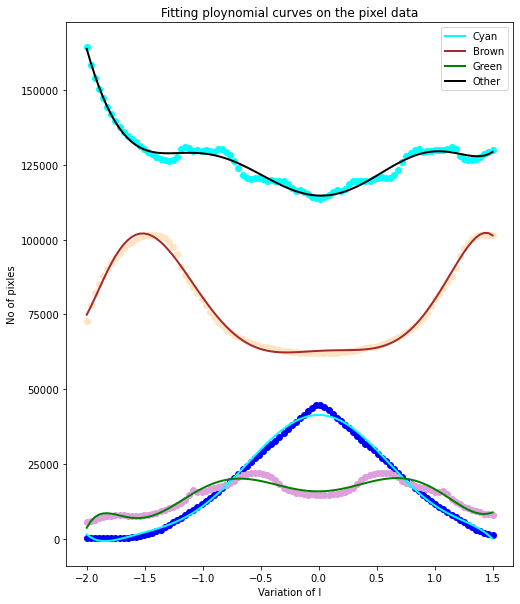

In [387]:
plt.figure(figsize=(8,10))
# Plotting for Cyan
plt.scatter(df.l, df.cyan_l,  color='b')
yy = intercept[0]+ coeff[0][1]*k+ coeff[0][2]*np.power(k, 2) + coeff[0][3]*np.power(k, 3) +coeff[0][4]*np.power(k, 4) + coeff[0][5]*np.power(k, 5) + coeff[0][6]*np.power(k, 6) + coeff[0][7]*np.power(k, 7) +coeff[0][8]*np.power(k, 8)
plt.plot(k, yy, color='Cyan' , label = 'Cyan', linewidth = 2)

# Plotting for Brown
plt.scatter(df.l, df.brown_l,  color='bisque')
yy = intercept[1]+ coeff[1][1]*k+ coeff[1][2]*np.power(k, 2) + coeff[1][3]*np.power(k, 3) +coeff[1][4]*np.power(k, 4) + coeff[1][5]*np.power(k, 5) + coeff[1][6]*np.power(k, 6) + coeff[1][7]*np.power(k, 7) +coeff[1][8]*np.power(k, 8)
plt.plot(k, yy, color='brown' , label = 'Brown', linewidth = 2)

# Plotting for Green
plt.scatter(df.l, df.green_l,  color='plum')
yy = intercept[2]+ coeff[2][1]*k+ coeff[2][2]*np.power(k, 2) + coeff[2][3]*np.power(k, 3) +coeff[2][4]*np.power(k, 4) + coeff[2][5]*np.power(k, 5) + coeff[2][6]*np.power(k, 6) + coeff[2][7]*np.power(k, 7) +coeff[2][8]*np.power(k, 8)
plt.plot(k, yy, color='green' , label = 'Green', linewidth = 2)

# Plotting for others
plt.scatter(df.l, df.other_l,  color='aqua')
yy = intercept[3]+ coeff[3][1]*k+ coeff[3][2]*np.power(k, 2) + coeff[3][3]*np.power(k, 3) +coeff[3][4]*np.power(k, 4) + coeff[3][5]*np.power(k, 5) + coeff[3][6]*np.power(k, 6) + coeff[3][7]*np.power(k, 7) +coeff[3][8]*np.power(k, 8)
plt.plot(k, yy, color='black' , label = 'Other', linewidth = 2)

plt.title('Fitting ploynomial curves on the pixel data')
plt.xlabel("Variation of l")
plt.ylabel("No of pixles")
plt.legend()
plt.show()

# Varying both k and l

In [396]:
k = np.linspace(-2,1.5,100)
l = np.linspace(-2,1.5,100)*1j
m = k + l
images = []
for m in m:
    image = Image.new("RGB", (imgx, imgy)) 
    for y in range(imgy): 
            zy = y * (yb - ya) / (imgy - 1)  + ya 
            for x in range(imgx): 
                zx = x * (xb - xa) / (imgx - 1)  + xa 
                z = zx + zy * 1j
                c = z 
                for i in range(maxIt): 
                    if np.all(abs(z) > 2.0): break
                    z = z * z + c + m
                image.putpixel((x, y), (i % 4 * 64, i % 8 * 32, i % 16 * 16)) 
    images.append(image)

In [398]:
images[0].save('c.gif',
               save_all=True,
               append_images=images[1:],
               duration=100,
               loop=0)

In [ ]:
# Trying to do lagrange interpolation on some specific points

In [414]:
I = np.asarray(images[50])

In [481]:
color = (0,128,0)
indices = np.where(I == color)
coordinates = zip(indices[0], indices[1])
unique_coordinates = list(set(list(coordinates)))

In [484]:
uni = np.asarray(unique_coordinates)
len(uni)#.shape

40375

In [485]:
x_ = []
y_ = []
for i in range(len(uni)):
    x_.append(uni[i][0])
    y_.append(uni[i][1])

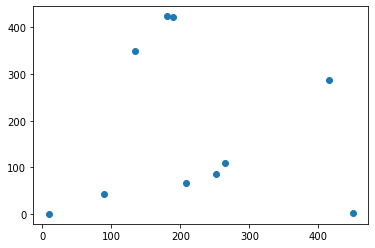

In [494]:
plt.scatter(x_[:10],y_[:10])
plt.show()

In [495]:
n = len(y_[:10])
def lag(n,x,y,X):
    f = 0
    for i in range(n-1):
        L = 1
        for j in range(n-1):
            if i!= j:
                L = L*((X-x[j])/(x[i]-x[j]))
        f += L*y[i]
    return f   

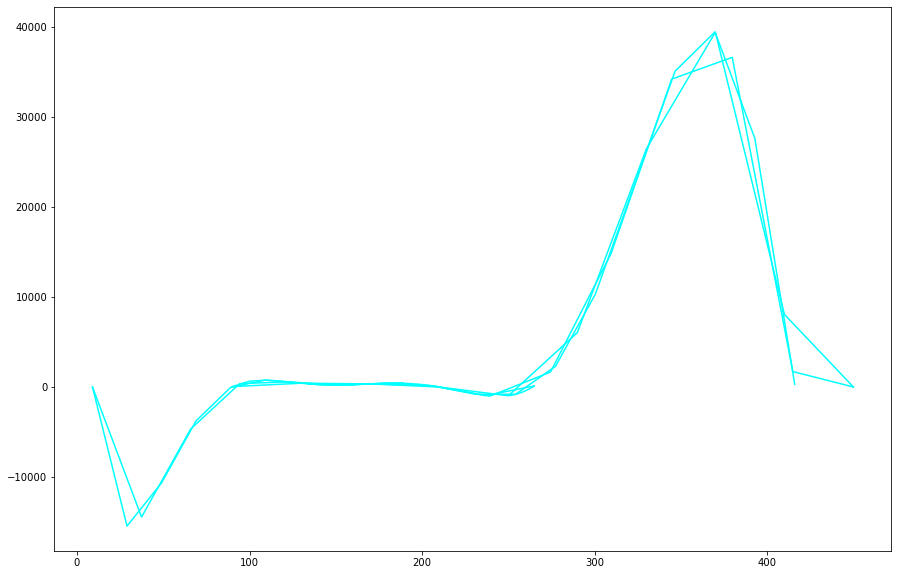

In [496]:
plt.figure(figsize=(15,10))
for i in range(n-1):
    X = np.linspace(x_[i], x_[i+1], 10)
    plt.plot(X, lag(n,x_,y_,X), color = 'cyan')
    
plt.show()